# API Keys

In [6]:
from dotenv import load_dotenv

load_dotenv()

True

# Messages as state

In [5]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage("So you said you ware researching ocean mammals?", name="Bot")]
messages.append(HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="Tiago"))

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you ware researching ocean mammals?
================================ Human Message =================================
Name: Tiago

Yes, I know about whales. But what others should I learn about?


In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

llm.invoke(messages)

AIMessage(content='That\'s a fantastic field to research! While whales (which include dolphins and porpoises, collectively known as cetaceans) are fascinating, there\'s a whole world of other incredible ocean mammals out there.\n\nHere are the main groups you should definitely learn about:\n\n1.  **Pinnipeds (Seals, Sea Lions, and Walruses):**\n    *   **General:** These are "fin-footed" mammals, highly adapted to aquatic life but still coming ashore to breed, rest, and molt. They\'re found in diverse marine environments from polar to tropical waters.\n    *   **True Seals (Phocidae):** These seals lack external ear flaps and move on land by wriggling their bodies. Examples include:\n        *   **Harbor Seals:** Common along coastlines in the Northern Hemisphere.\n        *   **Elephant Seals:** Known for their massive size (especially males with their trunk-like noses) and deep-diving abilities.\n        *   **Leopard Seals:** Apex predators of the Antarctic, known for hunting pengui

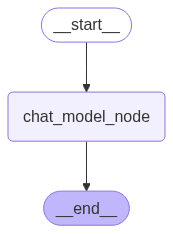

In [8]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)

# Logic
builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
output = graph.invoke({"messages": messages})

for message in output["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you ware researching ocean mammals?
================================ Human Message =================================
Name: Tiago

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

That's an excellent field to be researching! Ocean mammals are incredibly diverse and fascinating. Since you already know about whales (which are part of the *cetacean* order), let's dive into some other amazing groups you should definitely learn about:

1.  **Dolphins & Porpoises (also Cetaceans, but often discussed separately from "whales")**
    *   **Dolphins:** These are smaller, often more agile and social cetaceans. There are many species!
        *   **Bottlenose Dolphins:** The most common and well-known, often seen near coasts.
        *   **Orcas (Killer Whales):** While called "whales," they are actua

# Reducer

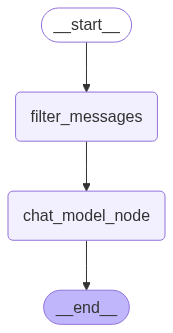

In [19]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState) -> MessagesState:
    # MessagesState é um Annotated[list, add_messages]. Por isso, quando
    # receber delete_messages irá remover (sobrescrever) as menssagens
    # que possuem o mesmo id das menssagens em delete_messages.
    delete_messages = [RemoveMessage(id=message.id) for message in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)
builder.add_node("filter_messages", filter_messages)

# Logic
builder.add_edge(START, "filter_messages")
builder.add_edge("filter_messages", "chat_model_node")
builder.add_edge("chat_model_node", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
messages = [AIMessage("Hi.", name="Bot")]
messages.append(HumanMessage("Hi.", name="Tiago"))
messages.append(AIMessage("So you said you ware researching ocean mammals?", name="Bot"))
messages.append(HumanMessage("Yes, I know whales. But what others should I learn about?"))

output = graph.invoke({"messages": messages})

for message in output["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you ware researching ocean mammals?
================================ Human Message =================================

Yes, I know whales. But what others should I learn about?
================================== Ai Message ==================================

That's a great start! Whales are indeed fascinating, and they belong to a larger group of ocean mammals called **Cetaceans**, which also includes dolphins and porpoises.

But there are several other major groups of ocean mammals that are equally amazing and diverse. Here's a breakdown of the main ones you should definitely learn about:

1.  **Cetaceans (Whales, Dolphins, and Porpoises):**
    *   **Whales:** You know these! They are fully aquatic, have blowholes, and are divided into two suborders:
        *   **Baleen Whales:** Filter feeders with baleen plates instead of teeth (e.g., Humpback, Blue, Fin, Right, Gray Whales).
   

# Trim

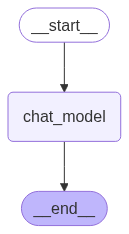

In [22]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState) -> MessagesState:
    messages = trim_messages(
        state["messages"],
        max_tokens=100,
        strategy="last",
        token_counter=llm,
        allow_partial=True
    )

    return {"messages": llm.invoke(messages)}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)

# Logic
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
messages.append(output["messages"][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Tiago"))

In [27]:
trim_messages(
        messages,
        max_tokens=100,
        strategy="last",
        token_counter=llm
    )

[HumanMessage(content='Tell me where Orcas live!', additional_kwargs={}, response_metadata={}, name='Tiago')]

In [28]:
output = graph.invoke({"messages": messages})

for message in output["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Tiago

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you ware researching ocean mammals?
================================ Human Message =================================

Yes, I know whales. But what others should I learn about?
================================== Ai Message ==================================

That's a great start! Whales are indeed fascinating, and they belong to a larger group of ocean mammals called **Cetaceans**, which also includes dolphins and porpoises.

But there are several other major groups of ocean mammals that are equally amazing and diverse. Here's a breakdown of the main ones you should definitely learn about:

1.  **Cetaceans (Whales, Dolphins, and Porpoises):**
    *   **Whales:** You know these! They are fully a